In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
from skimage import feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder


In [ ]:
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
def extract_features(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load and resize the image
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)  # Correct preprocessing step
    img_array = np.expand_dims(img_array, axis=0)
    features = model.predict(img_array)
    return features

In [ ]:
dataset_dir = '/content/sample_data/food_dataset'

In [ ]:
# Prepare data and labels
data = []
labels = []

for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(dataset_dir, filename)
        features = extract_features(image_path)
        data.append(features)
        labels.append(filename.split('_')[0])  # Assuming labels are part of the filename


1/1 [==============================] - 0s 181ms/step


In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Reshape the data to 2D
n_samples_train, n_features_train, _ = X_train.shape
X_train_reshaped = X_train.reshape((n_samples_train, n_features_train * X_train.shape[2]))

n_samples_test, n_features_test, _ = X_test.shape
X_test_reshaped = X_test.reshape((n_samples_test, n_features_test * X_test.shape[2]))

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_reshaped, y_train)

SVC()

In [ ]:
# Reshape the testing data to 2D
n_samples_test, n_features_test, _ = X_test.shape
X_test_reshaped = X_test.reshape((n_samples_test, n_features_test * X_test.shape[2]))

In [ ]:
# Predict the labels for the test data
y_pred = classifier.predict(X_test_reshaped)

In [ ]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.0


In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                  precision    recall  f1-score   support

000000000127.jpg       0.00      0.00      0.00       1.0
000000000982.jpg       0.00      0.00      0.00       1.0
000000001667.jpg       0.00      0.00      0.00       0.0
000000002411.jpg       0.00      0.00      0.00       1.0
000000002525.jpg       0.00      0.00      0.00       1.0
000000003671.jpg       0.00      0.00      0.00       0.0
000000004011.jpg       0.00      0.00      0.00       0.0
000000004259.jpg       0.00      0.00      0.00       0.0
000000004931.jpg       0.00      0.00      0.00       1.0
000000007420.jpg       0.00      0.00      0.00       1.0
000000007733.jpg       0.00      0.00      0.00       0.0
000000008718.jpg       0.00      0.00      0.00       0.0
000000009262.jpg       0.00      0.00      0.00       0.0
000000009677.jpg       0.00      0.00      0.00       0.0
000000009878.jpg       0.00      0.00      0.00       0.0
000000010856.jpg       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

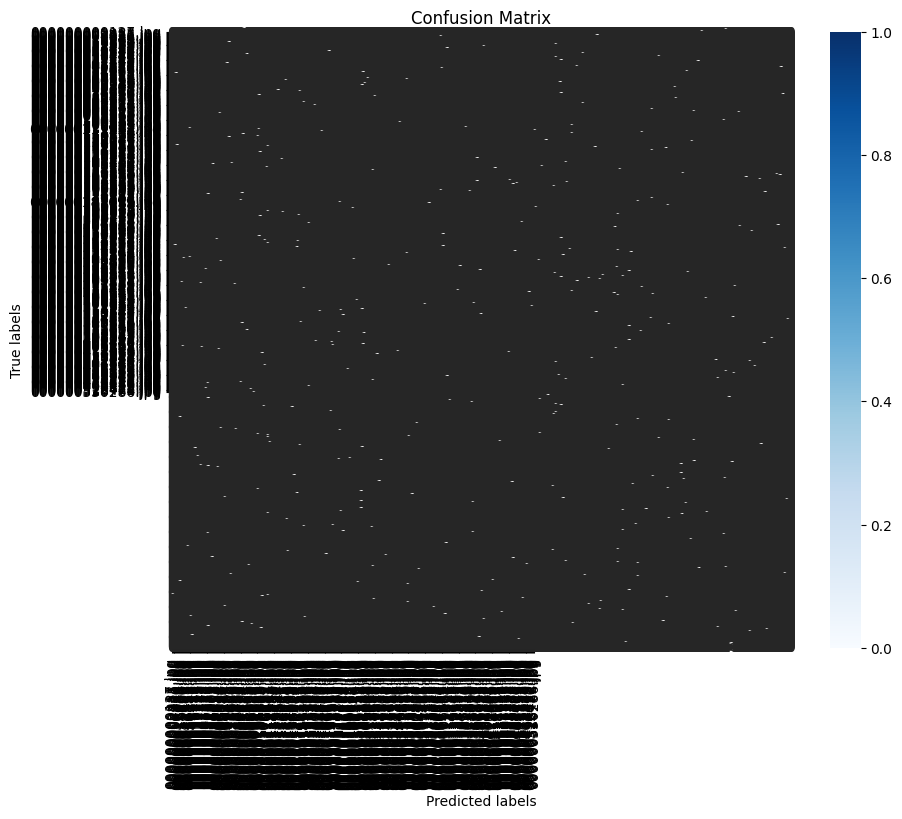

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()